In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
from pandas import DataFrame
import numpy as np

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering

In [3]:
newFilePath = "/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/synopsis-preprocessing/"

In [4]:
Y = pd.read_csv(newFilePath+'MatrixOfVectorizedSynopsis.csv')
titulos = Y['titulo']
Y = Y.drop(['Unnamed: 0','titulo'],1)

In [5]:
filePath = '/Users/luisricardoferraz/book-similarity/test/tutorial/tutorial/spiders/clustering/'

In [6]:
A = pd.read_csv(newFilePath+'MatrixOfDistances.csv')
A = A.drop(['Unnamed: 0'],1)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


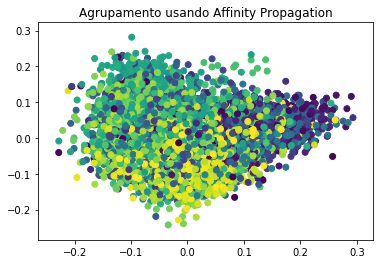

In [7]:
ap = AffinityPropagation(damping=0.7,max_iter=400,affinity='precomputed')
ap.fit(A)
apclusters = ap.labels_.tolist()

specificLogAffinity = ""

logAffinity = "Resultados do agrupamento usando Affinity Propagation"

logAffinity += "\n\nTotal de iterações: " + str(ap.n_iter_) + "\n"

apdataframe = pd.DataFrame()
apdataframe['titulo'] = titulos
apdataframe['cluster'] = apclusters

n_clusters = max(apdataframe['cluster'])+1

for i in range(n_clusters):
    new_dataframe = apdataframe.loc[apdataframe['cluster'] == i]
    lista_livros = []
    lista_livros = list(new_dataframe['titulo'])
    logAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros)) + "\n"
    specificLogAffinity += "\nTotal de livros do cluster %d" %i + ": " + str(len(lista_livros))
    specificLogAffinity += "\nLista de livros do cluster %d" %i + ": " + ", ".join(lista_livros) + "\n"

logAffinity += "\n\nÍndice Silhueta: " + str(metrics.silhouette_score(Y, ap.labels_, metric='euclidean'))

logAffinity += "\n\nÍndice Davies-Bouldin: " + str(metrics.davies_bouldin_score(Y, ap.labels_))

logAffinity += "\n\nÍndice Calinski-Harabasz: " + str(metrics.calinski_harabaz_score(Y, ap.labels_))


pca = PCA(n_components=2).fit_transform(Y)
pl.figure('Reference Plot')
pl.scatter(pca[:, 0], pca[:, 1], c=apdataframe['cluster'])
pl.title('Agrupamento usando Affinity Propagation')

plt.savefig(filePath+"resultado-Affinity-Propagation.png")
pl.show()

logAffinity += "\n\nArquivo: " + "resultado-Affinity-Propagation.png"
logAffinity += "\n\n"

with open(filePath+'listaDeLivros-AffinityPropagation.txt','w') as log:
    log.write(specificLogAffinity)
    
with open(filePath+'log-AffinityPropagation.txt','w') as log:
    log.write(logAffinity)